In [1]:
import pandas as pd
import sqlite3

In [37]:
db_path = 'test.sqlite'
conn = sqlite3.connect(db_path)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

          name
0    biography
1       friend
2  group_table
3        photo
4         post
5         user


In [38]:
df_biography = pd.read_sql_query("SELECT * FROM biography", conn)
df_friend = pd.read_sql_query("SELECT * FROM friend", conn)
df_group_table = pd.read_sql_query("SELECT * FROM group_table", conn)
df_photo = pd.read_sql_query("SELECT * FROM photo", conn)
df_post = pd.read_sql_query("SELECT * FROM post", conn)
df_user = pd.read_sql_query("SELECT * FROM user", conn)
#Дата в df_post в unixtime смотрю в месяц
#id, user_id, cnt_post, average_post_per_month, кол-во лайков, cnt_photo, cnt_group, cnt_friend, post_dates

In [39]:
df_post.head()

,id,user_id,text,isowner,date
0,1,357,Запись удалена,0,1571663570000
1,2,357,None,1,1725123819000
2,3,357,Присоединяюсь к акции «Журавли» в память о жер...,1,1711368952000
3,4,357,None,1,1706380907000
4,5,357,None,1,1703245572000


In [76]:
first = df_friend['user_id'].unique()
second = df_user['user_id'].unique()
for i in first:
    if i in second:
        print(1)

In [52]:
df_user = df_user.rename(columns = {'vk_id': 'user_id'})

In [49]:
df_user['age'].describe()

count    150.0
mean      19.0
std        0.0
min       19.0
25%       19.0
50%       19.0
75%       19.0
max       19.0
Name: age, dtype: float64

In [46]:
import pandas as pd
import numpy as np

# Создаем DataFrame с нужными столбцами
df_numbers = pd.DataFrame(columns=["id", 'user_id', 'age', 'cnt_post', 'cnt_photo', 'cnt_group', 'cnt_friend', 'post_dates', 'average_post_per_month'])

# Для каждого пользователя из df_user
for i, row in df_user.iterrows():
    user_id = row['vk_id']
    id = row['id']

    # Создаем пустую запись для пользователя
    new_row = {
        "id": id,
        'user_id': user_id,
        'cnt_post': 0,
        'average_post_per_month': 0,
        'cnt_photo': 0,
        'cnt_group': 0,
        'cnt_friend': 0,
        'post_dates': []
    }
    
    age = df_user[df_user['vk_id'] == user_id]['age']
    try:
        if (int(age.iloc[0]) >= 14 and int(age.iloc[0]) <= 17):
            new_row['age'] = 1
        elif (int(age.iloc[0]) >= 18 and int(age.iloc[0]) <= 21):
            new_row['age'] = 2
        elif (int(age.iloc[0]) >= 22 and int(age.iloc[0]) <= 25):
            new_row['age'] = 3
    except:
        continue

    # Подсчет друзей для user_id
    new_row['cnt_friend'] = len(df_friend[df_friend['user_id'] == id])

    # Подсчет постов и сбор дат постов
    user_posts = df_post[df_post['user_id'] == id]
    new_row['cnt_post'] = len(user_posts)
    new_row['post_dates'] = list(user_posts['date'])

    # Подсчет фотографий для user_id
    new_row['cnt_photo'] = len(df_photo[df_photo['user_id'] == id])

    # Подсчет групп для user_id
    new_row['cnt_group'] = len(df_group_table[df_group_table['user_id'] == id])

    # Добавляем новую строку в df_numbers
    df_numbers.loc[len(df_numbers)] = new_row

# Подсчет среднего количества постов в месяц (пример для 12 месяцев)
df_numbers['average_post_per_month'] = df_numbers['cnt_post'] / 12

df_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      150 non-null    int64  
 1   user_id                 150 non-null    object 
 2   age                     150 non-null    int64  
 3   cnt_post                150 non-null    int64  
 4   cnt_photo               150 non-null    int64  
 5   cnt_group               150 non-null    int64  
 6   cnt_friend              150 non-null    int64  
 7   post_dates              150 non-null    object 
 8   average_post_per_month  150 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 11.7+ KB


In [47]:
df_numbers.head()
df_numbers.to_csv('test_numbers.csv')

In [34]:
df_numbers = df_numbers.loc[df_numbers['cnt_friend'] != 5000]

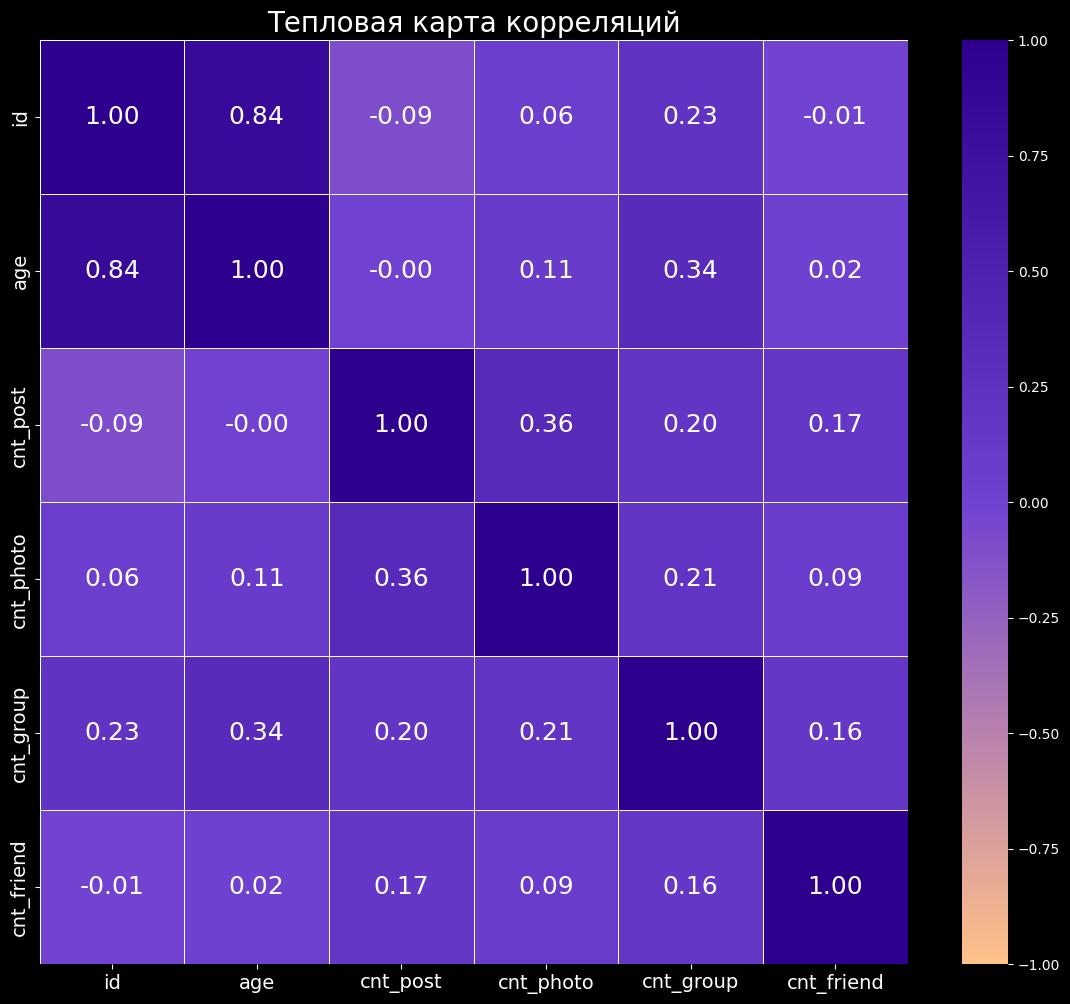

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
plt.style.use('dark_background')
gradient_colors = [(1, 193/255, 136/255),  # FCC188
                    (112/255, 66/255, 210/255),  # 7042D2
                    (46/255, 0, 142/255)]  # 2E008E

cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient_colors)

plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(df_numbers.select_dtypes(include=['number']).corr(), 
                        annot=True, 
                        cmap=cmap,  # Кастомная палитра
                        vmin=-1, 
                        vmax=1, 
                        fmt=".2f", 
                        linewidths=0.5,
                        annot_kws={"size": 18})  # Увеличение шрифта аннотаций (значений корреляции)

# Заголовок и оси с увеличенным шрифтом
heatmap.set_title('Тепловая карта корреляций', fontsize=20, color='white')

# Увеличение шрифта на осях
heatmap.tick_params(axis='both', which='major', labelsize=14, colors='white')

plt.show()

   id  id.1    user_id  age  cnt_post  average_post_per_month  cnt_photo  \
0   3     3  381637103    1         7                0.583333          2   
1   4     4  260892289    1        17                1.416667          7   
2   5     5  129110414    1        20                1.666667         18   
3   7     7  460983785    1        20                1.666667          1   
4   8     8  220406659    1        20                1.666667          3   

   cnt_group  cnt_friend  aver_post_emotions  shennon_groups  labels  
0         21          42            1.000000        1.394557       2  
1         84         194            0.764706        1.804987       2  
2         56         113            0.350000        1.690214       1  
3        200         214            0.150000        1.705421       1  
4          5         102            0.100000        1.039721       1  


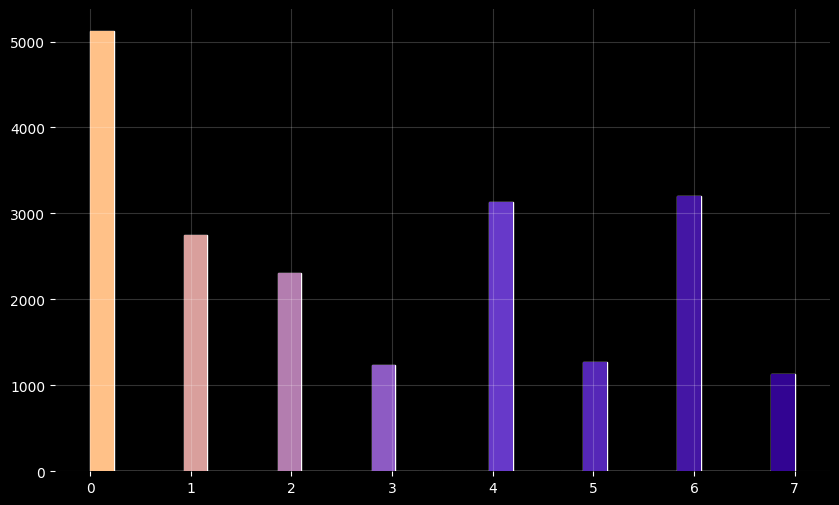

In [45]:
def plot_distribution(data: pd.Series, title: str, bins: int):
    # Установка стиля графика
    plt.style.use('dark_background')
    
    # Определение градиента цветов
    gradient_colors = [(1, 193/255, 136/255),  # FCC188
                        (112/255, 66/255, 210/255),  # 7042D2
                        (46/255, 0, 142/255)]  # 2E008E
    cmap = LinearSegmentedColormap.from_list("custom_gradient", gradient_colors)
    
    # Создание фигуры и осей
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Построение графика распределения
    sns.histplot(data, kde=False, ax=ax, color=cmap(0.5), bins=bins)
    
    # Установка градиента
    n, bins, patches = ax.hist(data, bins=bins, color=cmap(0.5), edgecolor="none")
    for i in range(len(patches)):
        patches[i].set_facecolor(cmap(i / len(patches)))
    
    # Настройка шрифта и стиля заголовка
    ax.set_title('', fontsize=18, fontname='Gilroy', color='white')
    
    # Установка цвета текста на белый
    ax.tick_params(colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Настройка шрифта для осей
    plt.xlabel('', fontsize=14, fontname='Gilroy')
    plt.ylabel('', fontsize=14, fontname='Gilroy')

    ax.grid(True, which='both', axis='both', color='white', alpha=0.2)

    plt.savefig(f'pred_{title}.png')
    # Показ графика

#plot_distribution(df_numbers['cnt_post'], 'cnt_post', 100)
#plot_distribution(df_numbers['cnt_friend'], 'cnt_friend', 30)
df = pd.read_csv('cju.csv')
print(df.head())
plot_distribution(df['labels'], 'labels', 30)

In [15]:
import requests
import time
access_token = '7467ea587467ea587467ea58a97776aa9e774677467ea58173abbe1a90fd6c976a91670'
user_list = list(df_numbers['user_id'])

def getjson(url, data=None):
    response = requests.get(url, params=data)
    response = response.json()
    return response

def get_all_posts(access_token, owner_id, count=100, offset=0):
    all_posts = []
    while True:
        try:
            wall = getjson('https://api.vk.com/method/wall.get',
                            {'owner_id': owner_id, 'offset': offset, 'count': count, 'access_token': access_token,
                            'v': '5.131'})
            posts = wall['response']['items']
        except:
            return 0

        all_posts.extend(posts)

        if len(wall['response']['items']) == 0:
            break
        else:
            offset += 100
    return all_posts

def get_group_name(owner_id):
    url = "https://api.vk.com/method/groups.getById"
    params = {
        "group_id": owner_id,
        "access_token": access_token,
        "v": "5.131"
    }
    response = requests.get(url, params=params)
    group_data = response.json()
    group_name = group_data["response"][0]["name"]

    return group_name

def get_all_liked_lists(access_token, owner_id, liked_object_id, count=1000, offset=0, friends_only=0):
    time.sleep(0.03)
    try:
        api_query = getjson('https://api.vk.com/method/likes.getList',
                            {'access_token': access_token, 'type': 'post', 'owner_id': int(owner_id), 'item_id': liked_object_id,
                                'filter': 'likes', 'friends_only': friends_only, 'count': count, 'v': '5.131'})
        Users_count = api_query['response']['count']
        List_of_users = api_query['response']['items']
    except:
        return 0, 0
    return Users_count, List_of_users

def get_all_sub(access_token, user_id, count=30, offset=0):
    time.sleep(0.03)
    subs = []
    try:
        api_query = getjson('https://api.vk.com/method/users.getSubscriptions',
                            {'access_token': access_token, 'extended': 1, 'user_id': user_id, 'offset': offset, 'count': count, 'v': '5.131'})
        sub = api_query['response']['items']
        subs.extend(sub)
    except:
        return 0  
    return subs

url = 'https://api.vk.com/method/wall.get'
params = {
    "domain": url.split("/")[-1],
    "access_token": access_token,
    "v": "5.131"
}
flag = 0
flag_two = 0
flag_end = 0

# Получение постов, которые пользователь лайкнул с поддержкой пагинации
def get_liked_posts(access_token, owner_id, count=100, offset=0):
    all_posts = []
    while True:
        try:
            wall = getjson('https://api.vk.com/method/fave.get',
                            {'item_type': 'post', 'tag_id': owner_id, 'offset': offset, 'count': count, 'access_token': access_token,
                            'v': '5.131'})
            print(wall)
            posts = wall['response']['items']
        except:
            return 0

        all_posts.extend(posts)

        if len(wall['response']['items']) == 0:
            break
        else:
            offset += 100
    return all_posts

print(user_list)
for i in user_list:
    flag_end += 1
    if (flag_end == 5001):
        break
    #subs = get_all_sub(access_token, i)
    #if subs == 0:
        #continue
    print(f'User: {flag_end}')
    user_liked_posts = get_liked_posts(access_token, i)

    # Собираем массив текстов лайкнутых постов
    liked_texts = [post['text'] for post in user_liked_posts if post['text']]

    df_numbers.loc[df_numbers['user_id'] == i, 'cnt_likes'] += len(user_liked_posts)
    df_numbers.loc[df_numbers['user_id'] == i, 'liked_text'] = liked_texts

    time.sleep(0.1)  # Задержка между запросами, чтобы не превысить лимиты AP

    '''for j in subs:
        posts = get_all_posts(access_token, j['id'])
        if posts == 0 or posts == []:
            continue
        for k in posts:
            cnt_likes, list_of_users = get_all_liked_lists(access_token, j['id'], k['id'])
            if (cnt_likes == 0):
                continue
            if (int(i) in list_of_users):
                print('YEAH')
                df_numbers.loc[df_numbers['user_id'] == i, 'cnt_likes'] += 1
                df_numbers.loc[df_numbers['user_id'] == i, 'liked_text'] = k['text']
                flag = 0
            else:                  
                flag += 1
                if flag == 7:
                    print('flag inrupt')
                    flag = 0
                    break'''

['304375450', '664945617', '381637103', '260892289', '129110414', '11061275', '460983785', '220406659', '8980316', '379798774', '369594795', '198289488', '16605288', '163309196', '355387873', '17127708', '345254780', '7117660', '15881232', '342066943', '36202549', '406305101', '19507418', '318671029', '390050560', '469597371', '422941528', '393487671', '133343174', '300542229', '331132832', '10519137', '495026852', '429733688', '452104813', '227539636', '295025486', '276530984', '49479783', '291203004', '365904889', '216978156', '37198463', '302655502', '13822039', '46789155', '97024915', '305039607', '274725139', '349447389', '164245067', '213422522', '465894733', '102212062', '404602751', '209464444', '329795499', '276477697', '489280475', '347347153', '294725192', '411647118', '314124114', '319191395', '429916915', '507463285', '5065737', '45637434', '14560089', '322751220', '36229193', '470417360', '252672792', '55438716', '344382890', '3348842', '153272203', '341325662', '11161568

TypeError: 'int' object is not iterable

In [30]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27240 entries, 0 to 27239
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          27240 non-null  int64  
 1   user_id     27240 non-null  object 
 2   first_name  27240 non-null  object 
 3   last_name   27240 non-null  object 
 4   birth_date  27240 non-null  object 
 5   age         27239 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.5+ MB


In [28]:
df_group_table['description'].unique()

array(['#WAR_music - музыка\\n#WAR_look - луки\\n#WAR_gif - гиф - анимация\\n#WAR_mimimi - что - то очень милое\\n#WAR_night_time - обнаженности\\n#WAR_video - видео\\n#WAR_cinema - наш кинотеатр\\n#WAR_admin - тексты админа\\n\\ncr : tumblr, instagram',
       'Интересный Таиланд - все о Таиланде, интересные места, фото',
       'Подборки фото', ...,
       'Бесплатные видео-уроки по веб-дизайну и разработке сайтов. \\n\\nВидео-курсы по:\\n- CSS3\\n- HTML5\\n- JavaScript\\n- PHP\\n- Photoshop и многое другое.',
       'Web Road - это платформа, на которой  IT сфера будет открытой и понятной как для новичков, так и для профессионалов.  \\n\\nВ блоге я буду делиться своими приложениями и процессами разработки.\\n\\nОсновные технологии: JavaScript, React, Node.js, TypeScript, Express, MongoDB.\\n\\n… Продолжение следует',
       'Пишу рэп биты на любой вкус. Если что-то интересует, пишите в лс.'],
      dtype=object)

In [26]:

def filter_only_id_user_id(df):
    return df.loc[:, ['id', 'user_id']]

# Получаем всех пользователей, у которых только id и user_id в каждом DataFrame
df_bio_filtered = filter_only_id_user_id(df_biography)
df_friend_filtered = filter_only_id_user_id(df_friend)
df_group_filtered = filter_only_id_user_id(df_group_table)
df_photo_filtered = filter_only_id_user_id(df_photo)
df_post_filtered = filter_only_id_user_id(df_post)

# Находим пересечение пользователей, которые содержатся во всех 6 DataFrame
common_users = df_bio_filtered \
    .merge(df_friend_filtered, on=['id', 'user_id']) \
    .merge(df_group_filtered, on=['id', 'user_id']) \
    .merge(df_photo_filtered, on=['id', 'user_id']) \
    .merge(df_post_filtered, on=['id', 'user_id'])

# Список пользователей, которые нужно удалить
users_to_remove = common_users['user_id'].tolist()

# Функция для удаления пользователей из DataFrame
def remove_users(df, users_to_remove):
    original_count = len(df)
    df_clean = df[~df['user_id'].isin(users_to_remove)]
    removed_count = original_count - len(df_clean)
    return df_clean, removed_count

df_biography_clean, bio_removed = remove_users(df_biography, users_to_remove)
df_friend_clean, friend_removed = remove_users(df_friend, users_to_remove)
df_group_table_clean, group_removed = remove_users(df_group_table, users_to_remove)
df_photo_clean, photo_removed = remove_users(df_photo, users_to_remove)
df_post_clean, post_removed = remove_users(df_post, users_to_remove)

# Подсчёт общего количества удалённых записей
total_removed = bio_removed + friend_removed + group_removed + photo_removed + post_removed

# Выводим результаты
print(f"Удалено записей из biography: {bio_removed}")
print(f"Удалено записей из friend: {friend_removed}")
print(f"Удалено записей из group_table: {group_removed}")
print(f"Удалено записей из photo: {photo_removed}")
print(f"Удалено записей из post: {post_removed}")
print(f"Общее количество удалённых записей: {total_removed}")

Удалено записей из biography: 1
Удалено записей из friend: 1164
Удалено записей из group_table: 15
Удалено записей из photo: 7
Удалено записей из post: 20
Общее количество удалённых записей: 1207


In [3]:
def read_sqlite(dbfile):
    import sqlite3
    from pandas import read_sql_query, read_sql_table

    with sqlite3.connect(dbfile) as dbcon:
        tables = list(read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])
        out = {tbl : read_sql_query(f"SELECT * from {tbl}", dbcon) for tbl in tables}
    return out
file = 
df = read_sqlite('db.sqlite')

DatabaseError: Execution failed on sql 'SELECT * FROM table_name': no such table: table_name